In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


original = pd.read_csv('./TimeGAN_PytorchRebuild/data/copper_data.csv')
synthetic = pd.read_csv('./TimeGAN_PytorchRebuild/data/synth_copper_data.csv')

In [2]:
original

,SUM,Φούρνος Προθέρμανσης 1 καύσης Φ.Α.,Φούρνος Προθέρμανσης 2 καύσης Φ.Α.,Φούρνοι Προθέρμανσης 1-2 καύσης Φ.Α.,Επαγωγικός Φούρνος Προθέρμανσης,Μηχανισμός αφαίρεσης οξειδίων πριν τη διέλαση,Κύριο σώμα μηχανισμού διέλασης,Έξοδος διέλασης,Υδραυλικές Αντλίες Πρέσας,Υδραυλικές Αντλίες Πρέσας.1,Αντλιοστάσιο Πρέσας,Q_KG (Produced Quantity),Q_ST (Produced Pieces),MACHMINS (MACHINE MINUTES),TOTDH (TOTAL DELAYS -HOURS)
0,569707.932906,25626.0,29678.0,27253.684183,130700.00,34067.105229,14555.00,30944.00,104115.00,126314.00,46455.143494,7068893,12436.0,23955,164.250
1,413096.783754,18717.0,19952.0,22214.887846,87800.00,27768.609807,10575.00,21850.00,75681.00,90672.00,37866.286101,5310606,9244.0,15645,103.250
2,552313.024886,25493.0,26938.0,30122.305144,116400.00,37652.881430,14012.00,29426.00,99505.00,121419.00,51344.838313,7010709,12301.0,22995,166.750
3,612465.649249,28429.0,28654.0,30064.807856,149400.00,37581.009820,15233.00,32161.00,108439.00,131257.00,51246.831573,7509501,13178.0,24635,175.750
4,647454.692318,28030.1,29260.4,44286.923575,133303.20,55358.654468,14706.02,31000.81,107438.52,128580.99,75489.074275,7463621,13139.0,24465,163.750
5,529641.696017,21136.1,23393.3,37520.392096,103435.22,46900.490120,18645.00,24342.46,91593.26,98720.26,63955.213800,5708452,10029.0,17860,116.333
6,705749.635529,14654.9,33487.2,55857.043007,162051.49,69821.303759,14129.53,32325.05,104867.24,123345.01,95210.868763,7322461,12766.0,21825,224.250
7,654254.269325,5337.0,23613.0,40042.849714,184948.00,50053.562143,12023.00,34213.00,109366.00,126403.00,68254.857468,6655842,11640.0,18870,344.500
8,639248.230869,15675.6,15490.8,43041.905277,160067.35,53802.381596,13950.74,31611.39,106314.03,125927.15,73366.883995,7225801,12709.0,22830,270.750
9,591130.099530,15301.4,14620.2,40187.083789,137586.52,50233.854737,16273.09,28305.78,100634.97,119486.49,68500.711004,6837359,11982.0,21555,168.250


In [3]:
synthetic

,SUM,Φούρνος Προθέρμανσης 1 καύσης Φ.Α.,Φούρνος Προθέρμανσης 2 καύσης Φ.Α.,Φούρνοι Προθέρμανσης 1-2 καύσης Φ.Α.,Επαγωγικός Φούρνος Προθέρμανσης,Μηχανισμός αφαίρεσης οξειδίων πριν τη διέλαση,Κύριο σώμα μηχανισμού διέλασης,Έξοδος διέλασης,Υδραυλικές Αντλίες Πρέσας,Υδραυλικές Αντλίες Πρέσας.1,Αντλιοστάσιο Πρέσας,Q_KG (Produced Quantity),Q_ST (Produced Pieces),MACHMINS (MACHINE MINUTES),TOTDH (TOTAL DELAYS -HOURS)
0,557996.454385,17534.175098,17315.450738,38042.232952,133515.563038,47552.789466,14468.809861,23489.519955,89418.516082,108549.394891,64844.715259,6.128112e+06,10759.665997,19377.970839,158.163018
1,624121.286607,18703.186769,17583.455159,46857.285966,156781.727478,58571.600562,12589.010924,25476.020093,91141.136640,116224.888284,79870.369104,6.798692e+06,11921.686477,22231.134349,164.660041
2,712700.838819,26013.802275,24578.810021,61691.095136,171899.778048,77113.868920,12223.804937,31843.037945,101823.358879,125087.797223,105155.275801,7.294995e+06,12783.893707,25050.398253,240.320038
3,716858.921782,29502.428763,27428.889353,55625.969216,181418.464328,69532.461520,9461.981956,28415.882785,107442.034692,133911.259037,94816.992982,7.749751e+06,13539.162254,25919.482983,149.273353
4,455396.570611,24730.702779,15163.890738,31973.581341,101183.708046,39966.976676,8628.055082,21348.023837,64406.907676,93407.128925,54500.422741,5.580523e+06,9716.475281,16352.135001,102.133032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,588802.758005,22881.002529,27146.643535,37086.484588,137287.816997,46358.104011,12754.965326,27583.354236,93178.916995,116038.821004,63215.601080,6.558288e+06,11502.824766,21748.783233,171.689444
341,587984.343937,22705.958942,27079.369067,36396.586961,137252.548741,45495.728530,12537.636335,27687.083065,93863.509838,117295.750175,62039.641567,6.647597e+06,11653.032716,21821.550312,167.786138
342,585814.498606,22540.150887,27105.671940,36012.159100,136283.761074,45015.197151,12452.796052,27662.430416,94389.423325,117758.800107,61384.359751,6.668212e+06,11688.246676,21758.052744,166.278671
343,583568.399528,22424.127463,27128.614861,35692.121812,135288.860495,44615.152265,12396.876501,27650.108556,94745.429655,118072.276434,60838.841647,6.675128e+06,11700.936229,21683.291399,166.067176


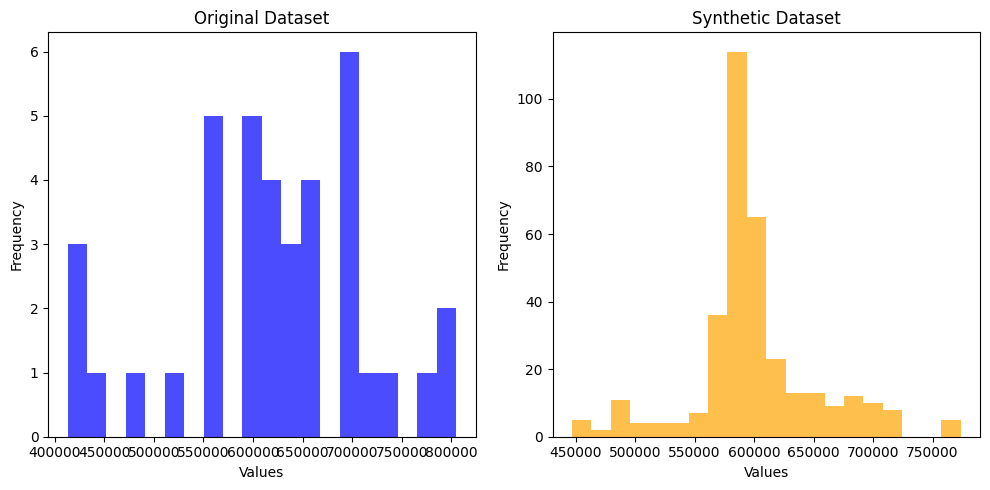

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_original and df_synthetic are your original and synthetic datasets loaded as pandas DataFrames

# Visualizing a single column from both datasets (you can repeat this for multiple columns)
column_to_visualize = 'SUM'

plt.figure(figsize=(10, 5))

# Plot original dataset
plt.subplot(1, 2, 1)
plt.hist(original[column_to_visualize], bins=20, color='blue', alpha=0.7)
plt.title('Original Dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Plot synthetic dataset
plt.subplot(1, 2, 2)
plt.hist(synthetic[column_to_visualize], bins=20, color='orange', alpha=0.7)
plt.title('Synthetic Dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming original_data and synthetic_data are pandas DataFrames

# Assuming 'SUM' is the target column
target_column = 'SUM'

# Extract features and target from the original dataset
X_original = original.drop(target_column, axis=1)  # Assuming other columns are features
y_original = original[target_column]

# Extract features and target from the synthetic dataset
X_synthetic = synthetic.drop(target_column, axis=1)
y_synthetic = synthetic[target_column]

# Split both datasets into train and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=41)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=41)

# Train a simple linear regression model on the original data
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)

# Evaluate model performance on original test data
y_pred_orig = model_orig.predict(X_test_orig)
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
print("MSE on original test data:", mse_orig)

# Train the same model on the synthetic data
model_syn = LinearRegression()
model_syn.fit(X_train_syn, y_train_syn)

# Evaluate model performance on synthetic test data
y_pred_syn = model_syn.predict(X_test_orig)
mse_syn = mean_squared_error(y_test_orig, y_pred_syn)
print("MSE on synthetic test data:", mse_syn)


MSE on original test data: 1.523088058940584e-16
MSE on synthetic test data: 194019063.86237913


In [49]:
y_test_orig, y_pred_syn, y_pred_orig

(27    699194.590013
 20    722772.489338
 8     639248.230869
 37    731678.152454
 14    602420.265818
 17    428620.846971
 7     654254.269325
 28    660429.116871
 Name: SUM, dtype: float64,
 array([693576.98062516, 692843.97659989, 630451.94511939, 712418.04993538,
        600428.90675735, 432712.40977411, 641865.07026135, 661963.47616031]),
 array([699194.59001272, 722772.48933812, 639248.23086852, 731678.15245355,
        602420.26581781, 428620.84697075, 654254.2693252 , 660429.11687084]))

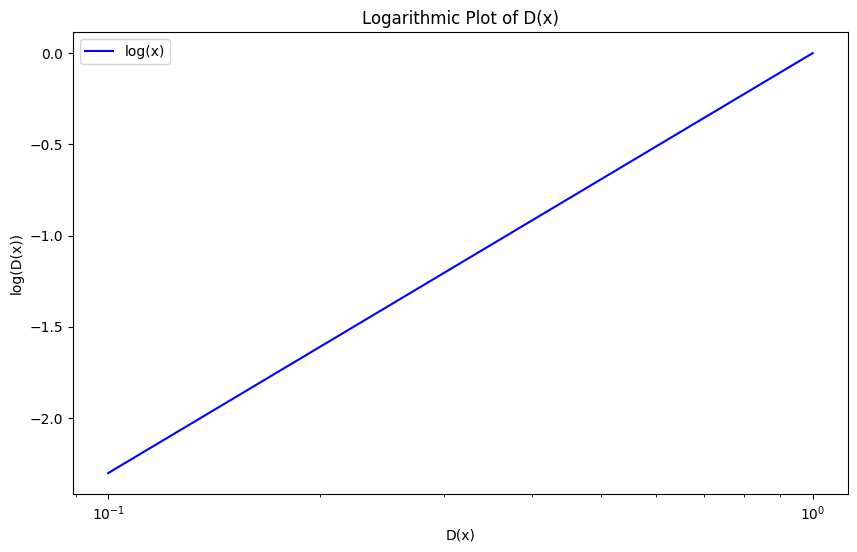

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x = np.linspace(0.1, 1, 100)  # x values from 0.01 to 1 to avoid log(0)
y = np.log(x)  # Example y values, you can replace this with your actual data

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='log(x)', color='blue')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Set axis labels and title
plt.xlabel('D(x)')
plt.ylabel('log(D(x))')
plt.title('Logarithmic Plot of D(x)')

# Add a legend
plt.legend()

# Show the plot
# plt.grid(True, which="both", ls="--")
plt.show()